In [2]:
%matplotlib inline
import pyodbc 
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
 
connection = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=DESKTOP-ATL660H;'
                      'Database=AdventureWorks2012;'
                      'Trusted_Connection=yes;')


In [3]:
query ='''
SELECT
A.[LineTotal] as Sales
,A.[UnitPrice]*A.[OrderQty] AS Revenue
,B.OrderDate
,CASE WHEN B.[OnlineOrderFlag] = 0 THEN 'Reseller' ELSE 'Online' END AS Sales_Channel
,C.[Name] AS Region
FROM[Sales].[SalesOrderDetail] AS A
LEFT JOIN [Sales].[SalesOrderHeader] AS B
ON A.[SalesOrderID] = B.[SalesOrderID]
LEFT JOIN [Sales].[SalesTerritory] AS C
ON B.[TerritoryID] = C.[TerritoryID]
WHERE C.[Name] = 'Australia'
'''

In [4]:
data= pd.read_sql(query,connection)
data

,Sales,Revenue,OrderDate,Sales_Channel,Region
0,3399.9900,3399.9900,2011-05-31,Online,Australia
1,3578.2700,3578.2700,2011-06-01,Online,Australia
2,3374.9900,3374.9900,2011-06-01,Online,Australia
3,3399.9900,3399.9900,2011-06-01,Online,Australia
4,3578.2700,3578.2700,2011-06-02,Online,Australia
5,3578.2700,3578.2700,2011-06-02,Online,Australia
6,3578.2700,3578.2700,2011-06-04,Online,Australia
7,3578.2700,3578.2700,2011-06-04,Online,Australia
8,699.0982,699.0982,2011-06-04,Online,Australia
9,3578.2700,3578.2700,2011-06-06,Online,Australia


In [5]:
cols = ['Revenue','Sales_Channel','Region']
df = data.drop(cols, axis=1, inplace=False)
df.head()

,Sales,OrderDate
0,3399.99,2011-05-31
1,3578.27,2011-06-01
2,3374.99,2011-06-01
3,3399.99,2011-06-01
4,3578.27,2011-06-02


In [6]:
df = df.set_index(['OrderDate'])

In [7]:
y = df['Sales'].resample('MS').sum()

In [8]:
y.head()

OrderDate
2011-05-01      3399.9900
2011-06-01    206252.9146
2011-07-01    222538.2892
2011-08-01    177393.5028
2011-09-01    214593.3928
Freq: MS, Name: Sales, dtype: float64

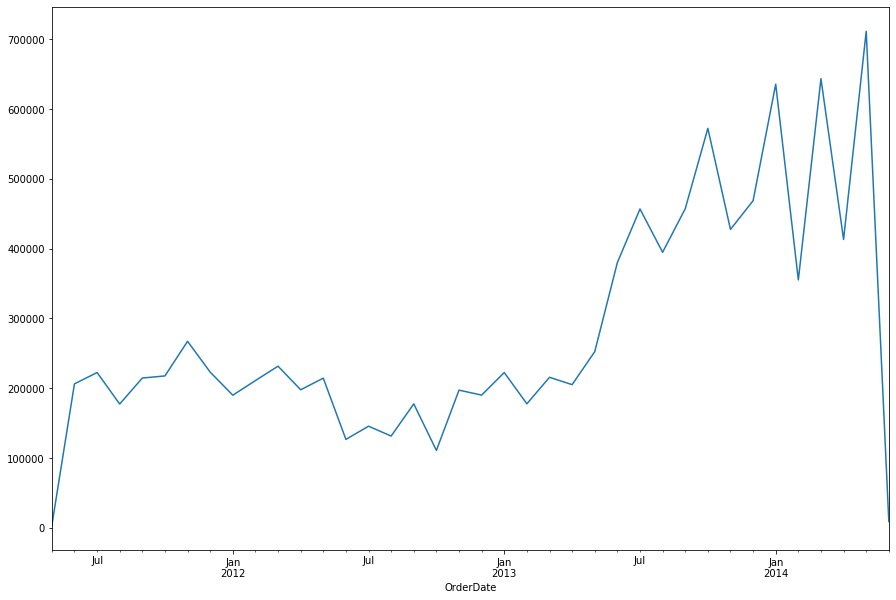

In [9]:
y.plot(figsize=(15, 10))
plt.show()

In [10]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [11]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1047.3576028959699
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:559714.950313802
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:694.9650731903201
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:718.8224107214213
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1086.420088780404
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.3900977119124
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1004.7281645068372
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:468854.9505132324
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:663.1621365417268
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:725.1786210861048
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:497050.86470908206
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:393.357597801605
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:967.3155996553584
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:661.2257180337881
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:681.2522072344753
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:362.52657344463
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:93

In [12]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(y,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 model - AIC:663.8780371456505


In [13]:
# print statistics
print(res.aic)
print(res.summary())

663.9584856823273
                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   38
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -327.979
Date:                            Thu, 02 Apr 2020   AIC                            663.958
Time:                                    11:31:44   BIC                            668.834
Sample:                                05-01-2011   HQIC                           665.311
                                     - 06-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9998      0.795     -1.257      0.209      -2.559       0.559
ma.L1         -0.

In [14]:
plt.style.use('fivethirtyeight')
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

In [15]:
from scipy.stats import chi2
chi = chi2.isf(q=0.05, df=116)
chi

142.13816003902645

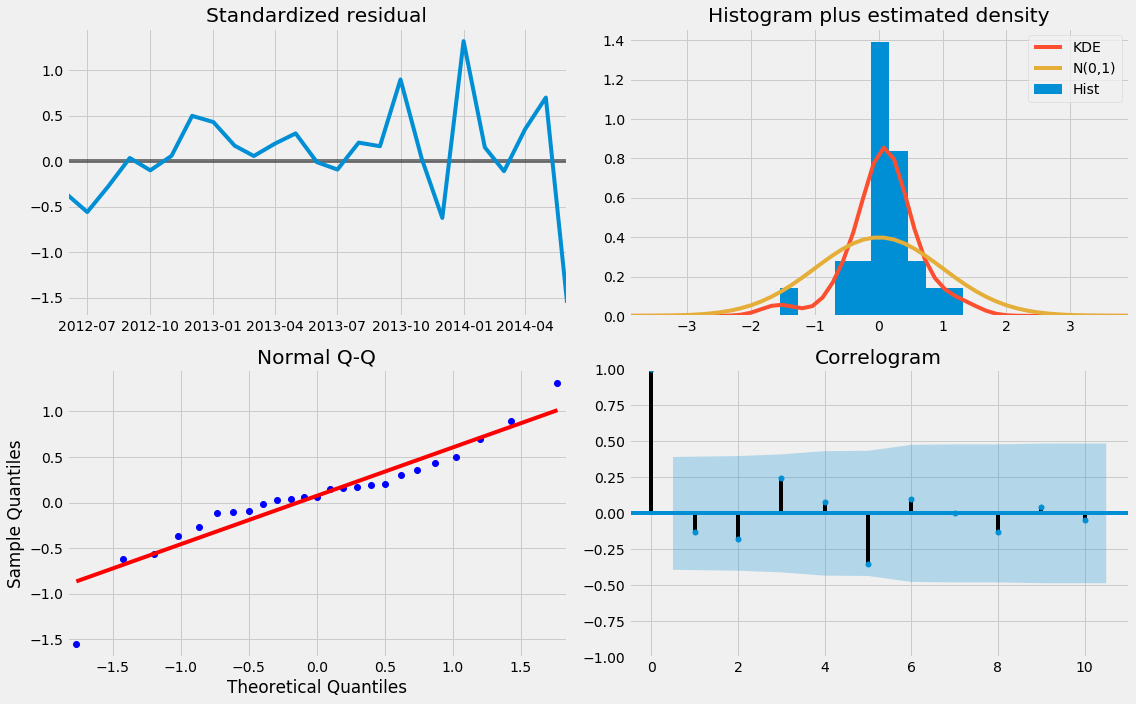

In [16]:
res.plot_diagnostics(figsize=(16, 10))
plt.tight_layout()
plt.show()

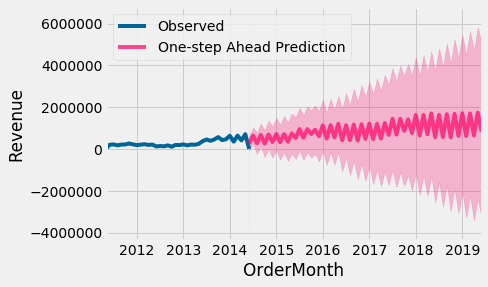

In [17]:
# in-sample-prediction and confidence bounds
pred = res.get_prediction(start=pd.to_datetime('2014-06-01'), 
                          end=pd.to_datetime('2019-06-01'),
                          dynamic=True)
pred_ci = pred.conf_int()
 
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(ax=ax, label='One-step Ahead Prediction', alpha=.7, color='#ff0066');
 
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
 
# style the plot
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2014-06-01'), y.index[-1], alpha=.15, zorder=-1, color='grey');
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

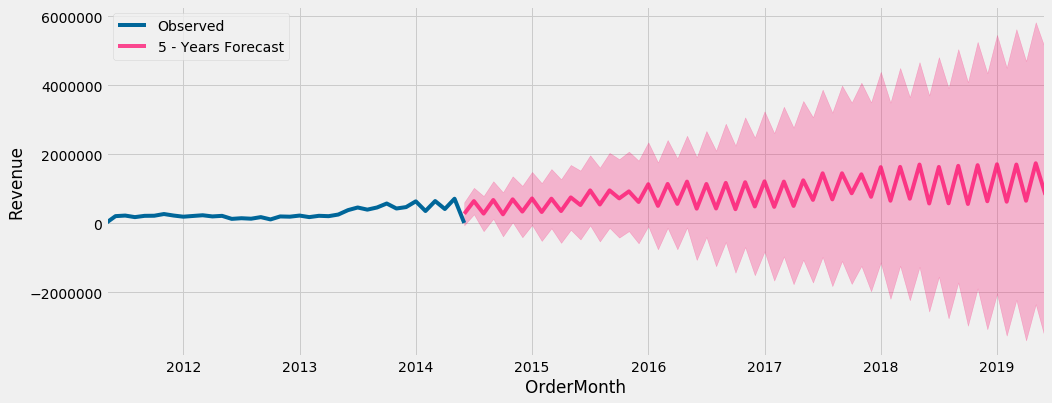

In [18]:
#pred.predicted_mean
# plot in-sample-prediction
ax = y.plot(label='Observed',color='#006699');
pred.predicted_mean.plot(figsize=(15, 6),label='5 - Years Forecast', alpha=.7, color='#ff0066')
# draw confidence bound (gray)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], color='#ff0066', alpha=.25);
#y.plot(figsize=(15, 6))
ax.set_xlabel('OrderMonth')
ax.set_ylabel('Revenue')
plt.legend(loc='upper left')
plt.show()

In [29]:
all_dfs = [y, pred.predicted_mean]

In [30]:
df = pd.DataFrame(np.array(pd.concat(all_dfs).reset_index(drop=False)), columns =  ['Month', 'Revenue'])

In [31]:
df = df.set_index(['Month'])

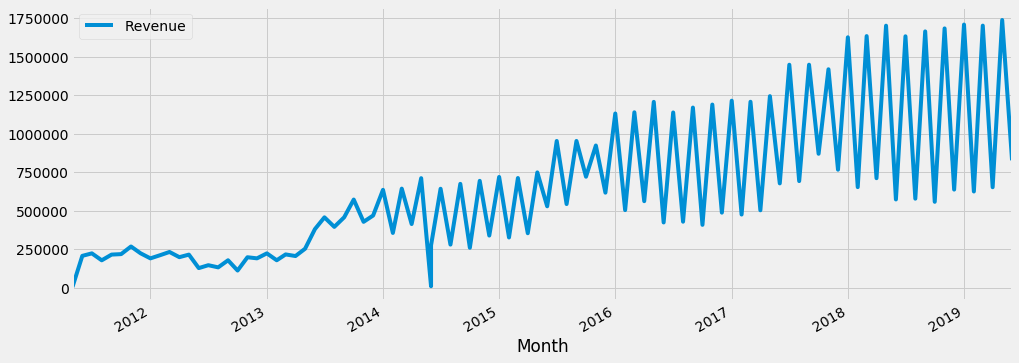

In [32]:
#df.plot(label='Revenue',color='#006699');
df.plot(figsize=(15, 6))

In [33]:
df.head()

,Revenue
Month,
2011-05-01,3399.99
2011-06-01,206253
2011-07-01,222538
2011-08-01,177394
2011-09-01,214593
